In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
%matplotlib inline
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('health care diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.shape

(768, 9)

## Project Task: Week 1


### Perform descriptive analysis. Understand the variables and their corresponding values. On the columns below, a value of zero does not make sense and thus indicates missing value

• Glucose

• BloodPressure

• SkinThickness

• Insulin

• BMI

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [7]:
df[df['Glucose']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


#### Here we can see that there are 5 rows for which value of Glucose is present as 0, this is practically not possible as there should be a minimal value of Glucose in a human body.

#### This is the same scenario with other features like 'BloodPressure','SkinThickness','Insulin' and 'BMI' as there shouldn't be any 0 value practically for these features

In [8]:
cols= ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for i in cols:
    print(f'No of Zeroes in {i} : {df[df[i]==0].value_counts().sum()}')

No of Zeroes in Glucose : 5
No of Zeroes in BloodPressure : 35
No of Zeroes in SkinThickness : 227
No of Zeroes in Insulin : 374
No of Zeroes in BMI : 11


#### Thus we need to replace these 0 values to correct the data for further processing. Here I'm using Simple Imputer to replace these 0 values with the mean of the respective features.

In [9]:
from sklearn.impute import SimpleImputer

mean_imputer=SimpleImputer(missing_values=0,strategy='mean')
df[cols]=mean_imputer.fit_transform(df[cols])


In [10]:
df[df['Glucose']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [11]:
for i in cols:
    print(f'No of Zeroes in {i} : {df[df[i]==0].value_counts().sum()}')

No of Zeroes in Glucose : 0
No of Zeroes in BloodPressure : 0
No of Zeroes in SkinThickness : 0
No of Zeroes in Insulin : 0
No of Zeroes in BMI : 0


#### Inference : Thus after imputing the 0 values with mean we cannot see any of  the 0 values in the features.

### 2. Visually explore these variables using histograms. Treat the missing values accordingly.

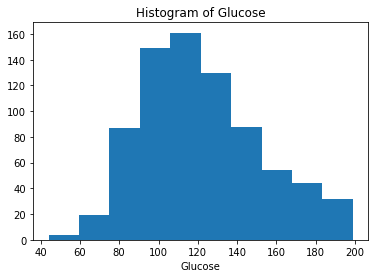

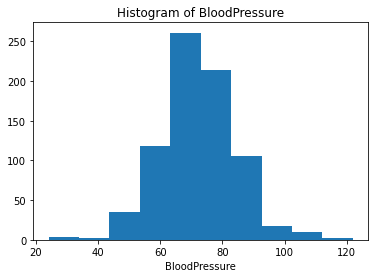

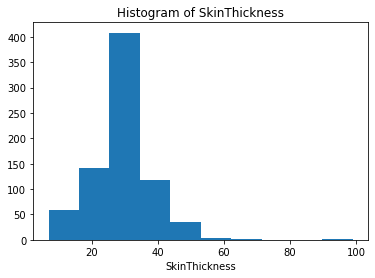

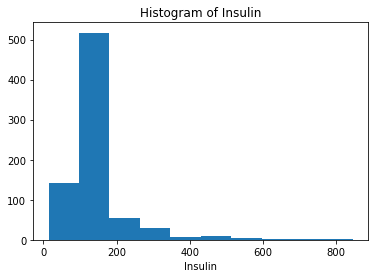

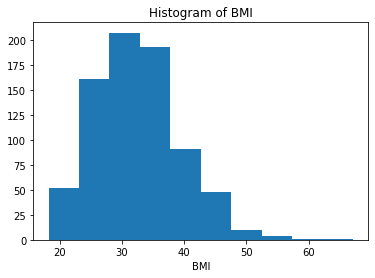

In [12]:
for i in cols:
    fig, ax = plt.subplots(1, 1)
    ax.hist(df[i])

    
    ax.set_title(f"Histogram of {i}")

   
    ax.set_xlabel(f'{i}')
   

### 3. There are integer and float data type variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


#### But here we can observe like features like Glucose, BloodPressure and few other features are shown as Float where it should be actually an integer.

Thus we will now change the datatype to integer for these respective columns below

In [14]:
int_cols=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','Age','Outcome']
df[int_cols]=df[int_cols].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int32  
 1   Glucose                   768 non-null    int32  
 2   BloodPressure             768 non-null    int32  
 3   SkinThickness             768 non-null    int32  
 4   Insulin                   768 non-null    int32  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int32  
 8   Outcome                   768 non-null    int32  
dtypes: float64(2), int32(7)
memory usage: 33.1 KB


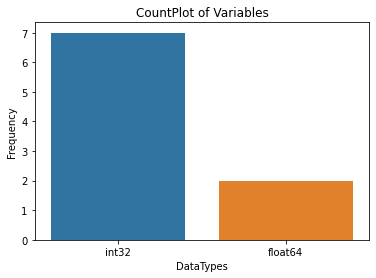

In [15]:
sns.countplot(df.dtypes.map(str))
plt.title('CountPlot of Variables')
plt.xlabel('DataTypes')
plt.ylabel('Frequency')
plt.show()

#### Now we can observe there are 2 Float features and 7 Integer Features in the data

## Project Task: Week 2
### Data Exploration:

### 1. Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action.

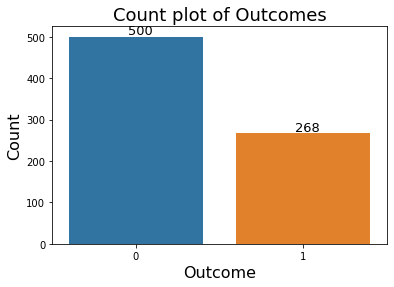

In [16]:
ax=sns.countplot(df['Outcome']) 
plt.title('Count plot of Outcomes', fontsize=18) 
plt.xlabel('Outcome', fontsize=16) 
plt.ylabel('Count', fontsize=16) 
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.35, p.get_height()+5), fontsize=13)
plt.show() 

#### Here we can notice that the Outcome data is Imbalanced data, which means that the target class contains uneven distribution of outcomes.

#### As the data is imbalanced we need to handle it by using ReSampling methods(Over Sampling or Under Sampling)

### 2. Create scatter charts between the pair of variables to understand the relationships. Describe your findings.

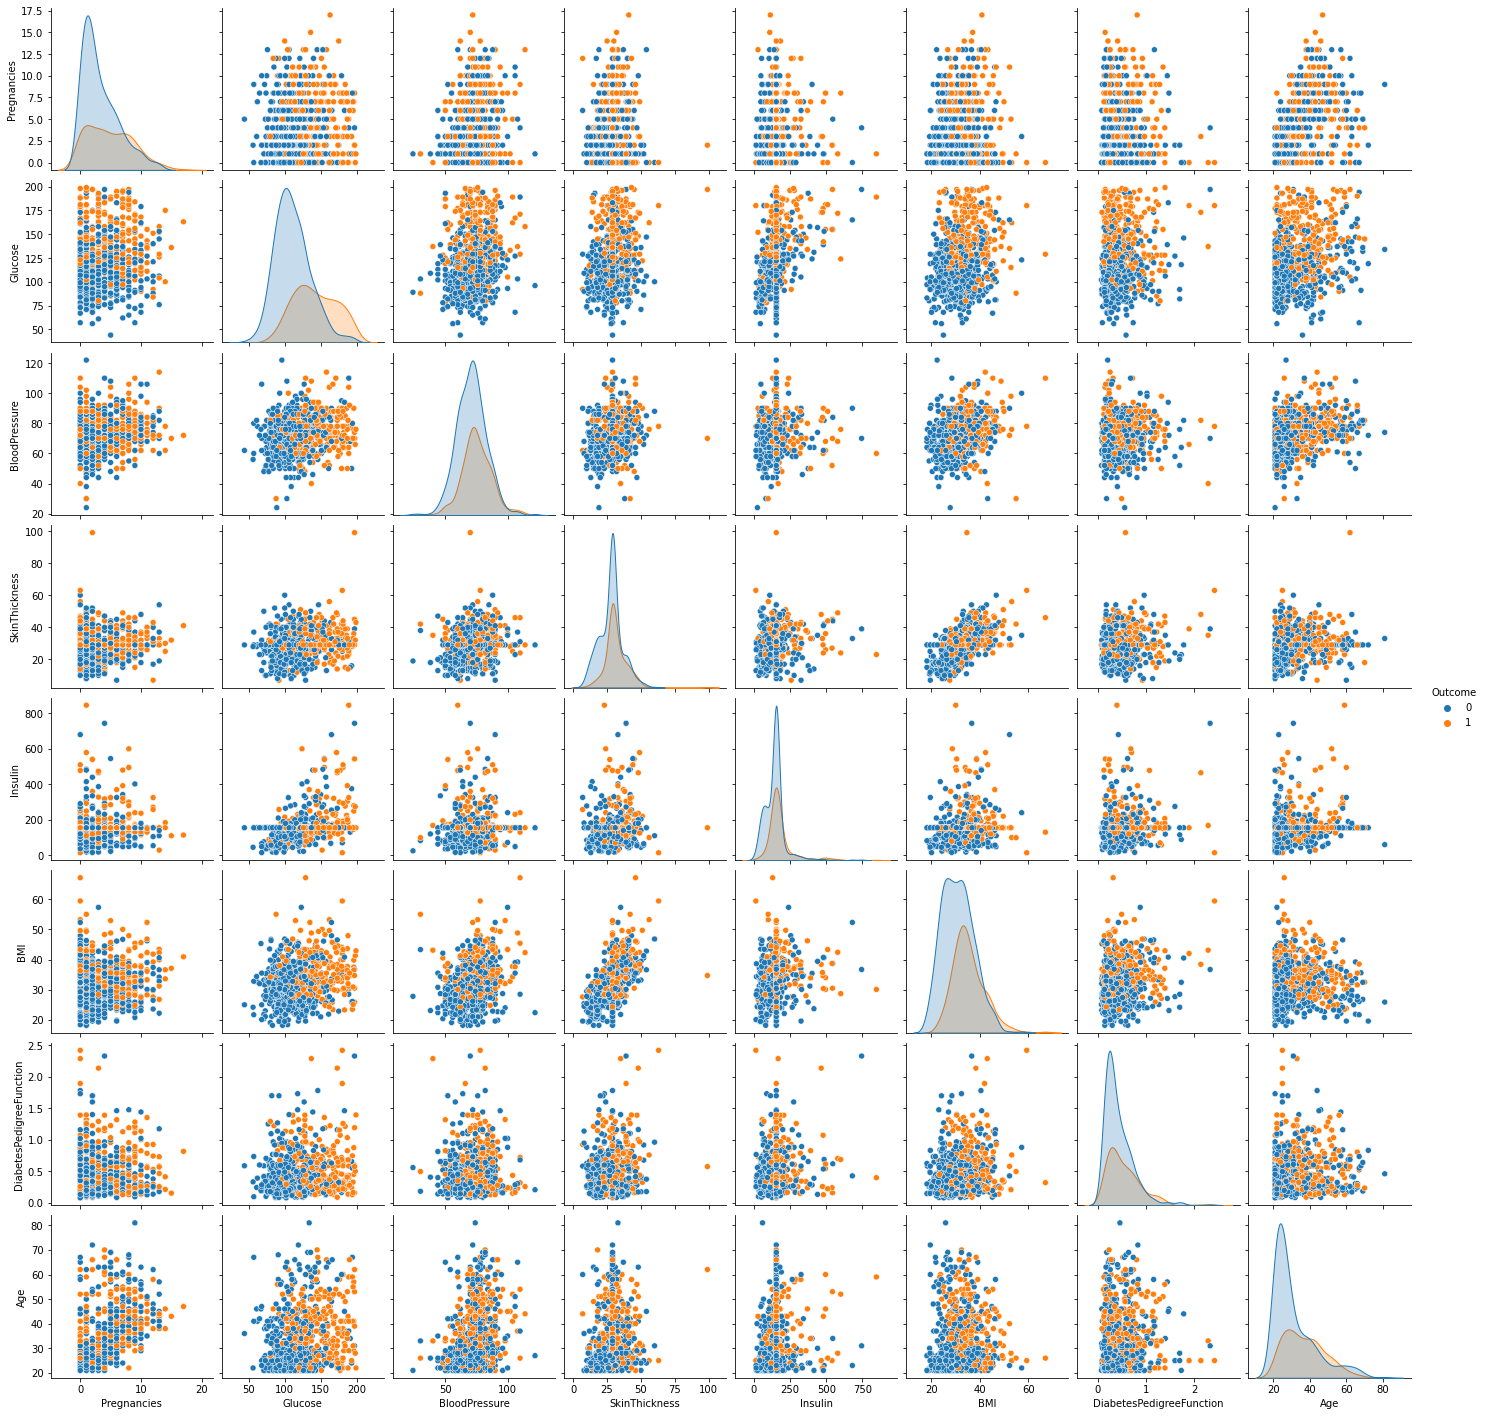

In [17]:
sns.pairplot(df,hue='Outcome')

#### We have some interesting observations from above scatter plot of pairs of features: 
• Glucose alone is impressively good to distinguish between the Outcome classes.

• Age alone is also able to distinguish between classes to some extent. 

• It seems none of pairs in the dataset is able to clealry distinguish between the Outcome classes.

• We need to use combination of features to build model for prediction of classes in Outcome. 

### 3. Perform correlation analysis. Visually explore it using a heat map.

In [18]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127957,0.208615,0.081770,0.055478,0.021565,-0.033523,0.544341,0.221898
Glucose,0.127957,1.000000,0.218615,0.192677,0.420301,0.230932,0.137100,0.266591,0.492911
BloodPressure,0.208615,0.218615,1.000000,0.191892,0.072041,0.281319,-0.002378,0.324915,0.165723
SkinThickness,0.081770,0.192677,0.191892,1.000000,0.158133,0.543162,0.102188,0.126107,0.214873
Insulin,0.055478,0.420301,0.072041,0.158133,1.000000,0.166881,0.099170,0.136050,0.214278
BMI,0.021565,0.230932,0.281319,0.543162,0.166881,1.000000,0.153400,0.025519,0.311924
DiabetesPedigreeFunction,-0.033523,0.137100,-0.002378,0.102188,0.099170,0.153400,1.000000,0.033561,0.173844
Age,0.544341,0.266591,0.324915,0.126107,0.136050,0.025519,0.033561,1.000000,0.238356
Outcome,0.221898,0.492911,0.165723,0.214873,0.214278,0.311924,0.173844,0.238356,1.000000


<AxesSubplot:>

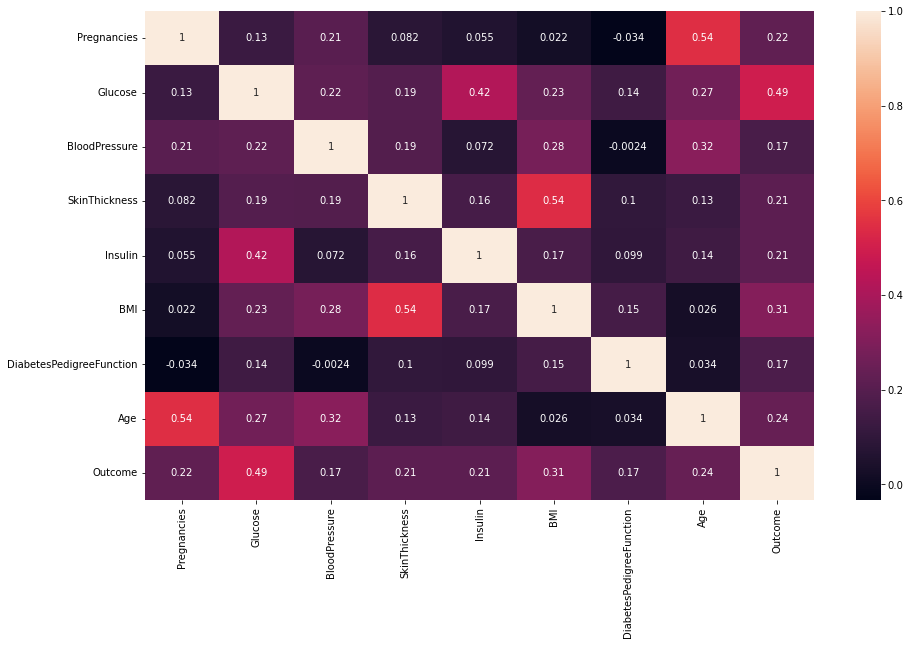

In [19]:
#Correlation analysis using heat map
plt.subplots(figsize=(15,9))
sns.heatmap(df.corr(),annot=True)

#### As we can see from heatmap, there is a significant correlation between feature pairs as below:

Age- Pregnancies

BMI- SkinThickness

Insulin- Glucose

## Project Task: Week 3

### Data Modeling:

#### 1. Devise strategies for model building. It is important to decide the right validation framework. Express your thought process.

#### 2. Apply an appropriate classification algorithm to build a model. Compare various models with the results from KNN algorithm.

In [20]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=101)

In [22]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_trainstd=ss.fit_transform(X_train)
X_teststd=ss.transform(X_test)

##### Since the data mostly consists of numeric values thus we use standard scaling to get Z scores for effective model.

###### Also we noticed that the output is heavily imbalanced, if we train the model using this imbalanced data we might tend to get an over fitting model and thus we'll need to use Sampling methods to make the data balanced. Here I'm using both Over Sampling and SMOTE techniques to balance the data.

In [23]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [24]:
import warnings
warnings.filterwarnings("ignore")
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
os=RandomOverSampler(0.75)
X_train_ns,y_train_ns=os.fit_resample(X_trainstd,y_train)

In [25]:
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0: 397, 1: 217})
The number of classes after fit Counter({0: 397, 1: 297})


In [26]:
from imblearn.combine import SMOTETomek
os=SMOTETomek(0.75)
X_train_sm,y_train_sm=os.fit_resample(X_trainstd,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_sm)))

The number of classes before fit Counter({0: 397, 1: 217})
The number of classes after fit Counter({0: 369, 1: 269})


#### As using both OverSampling and SMOTE techniques we're getting similar balance, I'm proceeding to use Oversampled data as it has comparitively more records to train the model

#### Using Logistic Regression

In [27]:

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train_ns, y_train_ns)

LogisticRegression()

In [28]:
from sklearn.metrics import accuracy_score
print('Logistic regression accuracy: {:.3f}'.format(accuracy_score(y_test,logreg.predict(X_teststd))))

Logistic regression accuracy: 0.773


Text(0.5, 1.0, 'Logistic Regression')

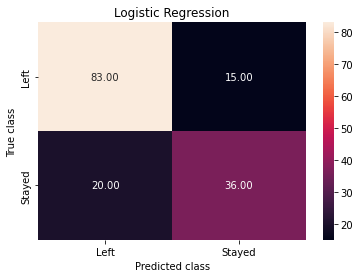

In [29]:
y_pred = logreg.predict(X_teststd)
from sklearn.metrics import confusion_matrix
import seaborn as sns
forest_cm = metrics.confusion_matrix(y_pred, y_test)
sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"])
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Logistic Regression')

### Using RandomForest

In [30]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_ns, y_train_ns)

RandomForestClassifier()

In [31]:
print('Random Forest Accuracy: {:.3f}'.format(accuracy_score(y_test,rf.predict(X_teststd))))

Random Forest Accuracy: 0.760


Text(0.5, 1.0, 'Random Forest')

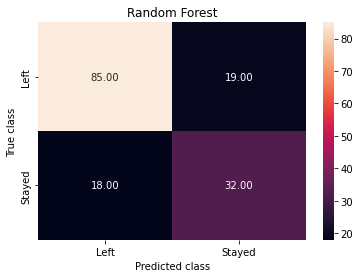

In [32]:
y_pred = rf.predict(X_teststd)
from sklearn.metrics import confusion_matrix
import seaborn as sns
forest_cm = metrics.confusion_matrix(y_pred, y_test)
sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"])
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')

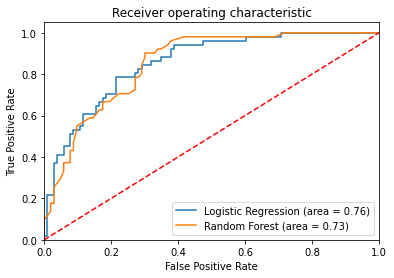

In [33]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_teststd))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_teststd)[:,1])
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_teststd))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_teststd)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

#### Using KNN Classifier

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train_ns, y_train_ns)
    
y_pred=knn.predict(X_teststd)
print(y_pred)

[1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0
 1 1 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1
 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0
 1 1 0 1 0 0]


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1]
Minimum error:- 0.21428571428571427 at K = 10


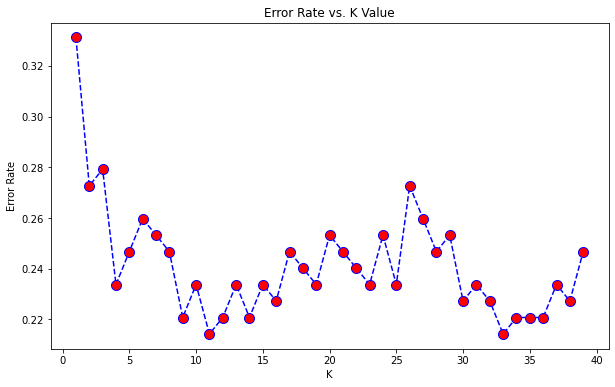

In [35]:
y_pred=knn.predict(X_test)
print(y_pred)

error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != np.array(y_test)))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

#### As we can see that best possible K value is at K=10. 

In [36]:
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_ns, y_train_ns)
    
y_pred=knn.predict(X_teststd)



In [37]:
print('KNN Classifier Accuracy: {:.3f}'.format(accuracy_score(y_test,knn.predict(X_teststd))))

KNN Classifier Accuracy: 0.792


In [38]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[86, 17],
       [15, 36]], dtype=int64)

Text(0.5, 1.0, 'KNN Classification')

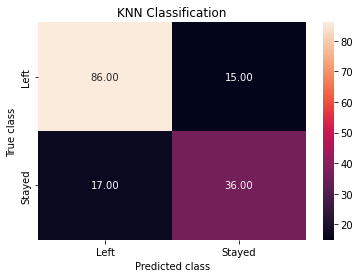

In [39]:
y_pred = knn.predict(X_teststd)
from sklearn.metrics import confusion_matrix
import seaborn as sns
forest_cm = metrics.confusion_matrix(y_pred, y_test)
sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"])
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('KNN Classification')

#### As we can see that KNN Classification has slightly better results compared to other models.

#### ROC CURVE using KNN

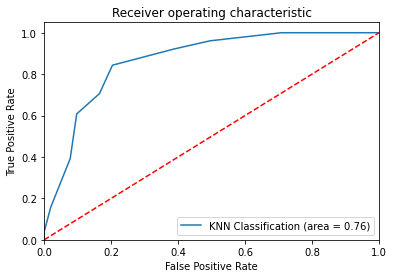

In [40]:

knn_roc_auc = roc_auc_score(y_test, knn.predict(X_teststd))
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_teststd)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='KNN Classification (area = %0.2f)' % logit_roc_auc)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## Data Reporting:

### Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business. The dashboard must entail the following:

a. Pie chart to describe the diabetic or non-diabetic population

b. Scatter charts between relevant variables to analyze the relationships

c. Histogram or frequency charts to analyze the distribution of the data

d. Heatmap of correlation analysis among the relevant variables

e. Create bins of these age values: 20-25, 25-30, 30-35, etc. Analyze different variables for these age brackets using a bubble chart.

https://public.tableau.com/app/profile/vikas6433/viz/HealthCareDiabetes_16599535660010/Dashboard1?publish=yes